This notebook correlates the sharptack data with Neuropixels data

## Load sharptrack data

In [1]:
%reload_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm
import xarray as xr
import seaborn as sns
import matplotlib.pylab as plt
import seaborn.objects as so
import numpy as np
from trialexp.process.anatomy import utils as anat_utils

In [2]:
base_path  = Path('/home/MRC.OX.AC.UK/ndcn1330/ettin/') # change it to your ettin path
sharp_track_path = base_path/'Teris'/'histology_analysis'/'TT004'/'Tapdvml_contacts.xlsx'
animal_id = 'TT004'

In [3]:
df_sharptrack = pd.read_excel(sharp_track_path)
df_sharptrack

,ap_mm,dv_mm,dv_mm_paxinos,ml_mm,annotation,name,acronym,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id,subject_id,probe_note,name_with_margin
0,0.470000,3.860000,2.721060,-2.490000,574,Caudoputamen,CP,1,1,2.266971,1.993346,optic fiber,NaN,NaN,NaN,boundary
1,0.470000,3.860000,2.721060,-2.490000,574,Caudoputamen,CP,2,1,2.266971,1.993346,optic fiber,NaN,NaN,NaN,boundary
2,0.474229,3.840806,2.703382,-2.494229,574,Caudoputamen,CP,3,1,2.246971,1.975760,optic fiber,NaN,NaN,NaN,boundary
3,0.474229,3.840806,2.703382,-2.494229,574,Caudoputamen,CP,4,1,2.246971,1.975760,optic fiber,NaN,NaN,NaN,boundary
4,0.478459,3.821611,2.685704,-2.498459,574,Caudoputamen,CP,5,1,2.226971,1.958174,optic fiber,NaN,NaN,NaN,boundary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.394131,2.525414,1.491907,-1.290000,1199,corpus callosum body,ccb,380,4,1.623003,1.355053,A,TT004-2023-07-31-145414,NaN,NaN,corpus callosum body
1532,0.402619,2.507189,1.475121,-1.290000,1199,corpus callosum body,ccb,381,4,1.603003,1.338355,A,TT004-2023-07-31-145414,NaN,NaN,corpus callosum body
1533,0.402619,2.507189,1.475121,-1.290000,1199,corpus callosum body,ccb,382,4,1.603003,1.338355,A,TT004-2023-07-31-145414,NaN,NaN,corpus callosum body
1534,0.411106,2.488964,1.458335,-1.290000,1199,corpus callosum body,ccb,383,4,1.583003,1.321657,A,TT004-2023-07-31-145414,NaN,NaN,corpus callosum body


### Load neuropixel results

In [4]:
path = base_path/Path('Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22')
files = list(Path(path).glob(f'{animal_id}*/processed/xr_spikes_trials.nc'))
files

[PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT004-2023-07-31-152723/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT004-2023-07-27-155821/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT004-2023-07-31-145414/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT004-2023-07-26-140547/processed/xr_spikes_trials.nc')]

In [5]:
# extract the firing rate and maxwaveformCh from the xr_spikes_trials.nc xarray dataset
data_list = []
for i in tqdm(range(len(files))):
    dataset = xr.open_dataset(files[i])
    da = dataset[['firingRate','maxWaveformCh1']]
    data_list.append(da)

cell_da = xr.merge(data_list)


  0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
df_cell = cell_da.to_dataframe().reset_index()
df_cell = anat_utils.format_cell4merge(df_cell)
df_cell

,cluID,firingRate,maxWaveformCh1,session_id,probe,id,session_date
0,TT004-2023-07-26-140547_ProbeA_1,5.533111,6.0,TT004-2023-07-26-140547,A,1,TT004-2023-07-26
1,TT004-2023-07-26-140547_ProbeA_10,1.244573,1.0,TT004-2023-07-26-140547,A,10,TT004-2023-07-26
2,TT004-2023-07-26-140547_ProbeA_100,0.208729,39.0,TT004-2023-07-26-140547,A,100,TT004-2023-07-26
3,TT004-2023-07-26-140547_ProbeA_101,1.653463,33.0,TT004-2023-07-26-140547,A,101,TT004-2023-07-26
4,TT004-2023-07-26-140547_ProbeA_102,11.313969,35.0,TT004-2023-07-26-140547,A,102,TT004-2023-07-26
...,...,...,...,...,...,...,...
1074,TT004-2023-07-31-152723_ProbeA_90,0.324822,44.0,TT004-2023-07-31-152723,A,90,TT004-2023-07-31
1075,TT004-2023-07-31-152723_ProbeA_96,9.637826,50.0,TT004-2023-07-31-152723,A,96,TT004-2023-07-31
1076,TT004-2023-07-31-152723_ProbeA_97,1.877235,54.0,TT004-2023-07-31-152723,A,97,TT004-2023-07-31
1077,TT004-2023-07-31-152723_ProbeA_98,0.127343,50.0,TT004-2023-07-31-152723,A,98,TT004-2023-07-31


### Match sharptrack to cluster

In [7]:
# There may be multiple recordings on the same date, but usually only 1 probe penetration
# so here we merge based on the date instead of the sesison_id

df_sharptrack['session_date'] = df_sharptrack['session_id'].apply(anat_utils.get_session_date)

df_cell_merge = df_cell.merge(df_sharptrack, left_on=['session_date','probe','maxWaveformCh1'],
                              right_on = ['session_date', 'probe_AB','contact_id'])
df_cell_merge.head()

,cluID,firingRate,maxWaveformCh1,session_id_x,probe,id,session_date,ap_mm,dv_mm,dv_mm_paxinos,...,acronym,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id_y,subject_id,probe_note,name_with_margin
0,TT004-2023-07-26-140547_ProbeA_1,5.533111,6.0,TT004-2023-07-26-140547,A,1,TT004-2023-07-26,-0.592386,4.223886,3.056199,...,int,6,2,3.396584,2.809660,A,TT004-2023-07-26-140547,NaN,NaN,boundary
1,TT004-2023-07-26-140547_ProbeA_27,0.075239,6.0,TT004-2023-07-26-140547,A,27,TT004-2023-07-26,-0.592386,4.223886,3.056199,...,int,6,2,3.396584,2.809660,A,TT004-2023-07-26-140547,NaN,NaN,boundary
2,TT004-2023-07-26-140547_ProbeA_10,1.244573,1.0,TT004-2023-07-26-140547,A,10,TT004-2023-07-26,-0.610000,4.260000,3.089460,...,int,1,2,3.436584,2.842748,A,TT004-2023-07-26-140547,NaN,NaN,boundary
3,TT004-2023-07-26-140547_ProbeA_4,1.162886,1.0,TT004-2023-07-26-140547,A,4,TT004-2023-07-26,-0.610000,4.260000,3.089460,...,int,1,2,3.436584,2.842748,A,TT004-2023-07-26-140547,NaN,NaN,boundary
4,TT004-2023-07-26-140547_ProbeA_6,0.374853,1.0,TT004-2023-07-26-140547,A,6,TT004-2023-07-26,-0.610000,4.260000,3.089460,...,int,1,2,3.436584,2.842748,A,TT004-2023-07-26-140547,NaN,NaN,boundary


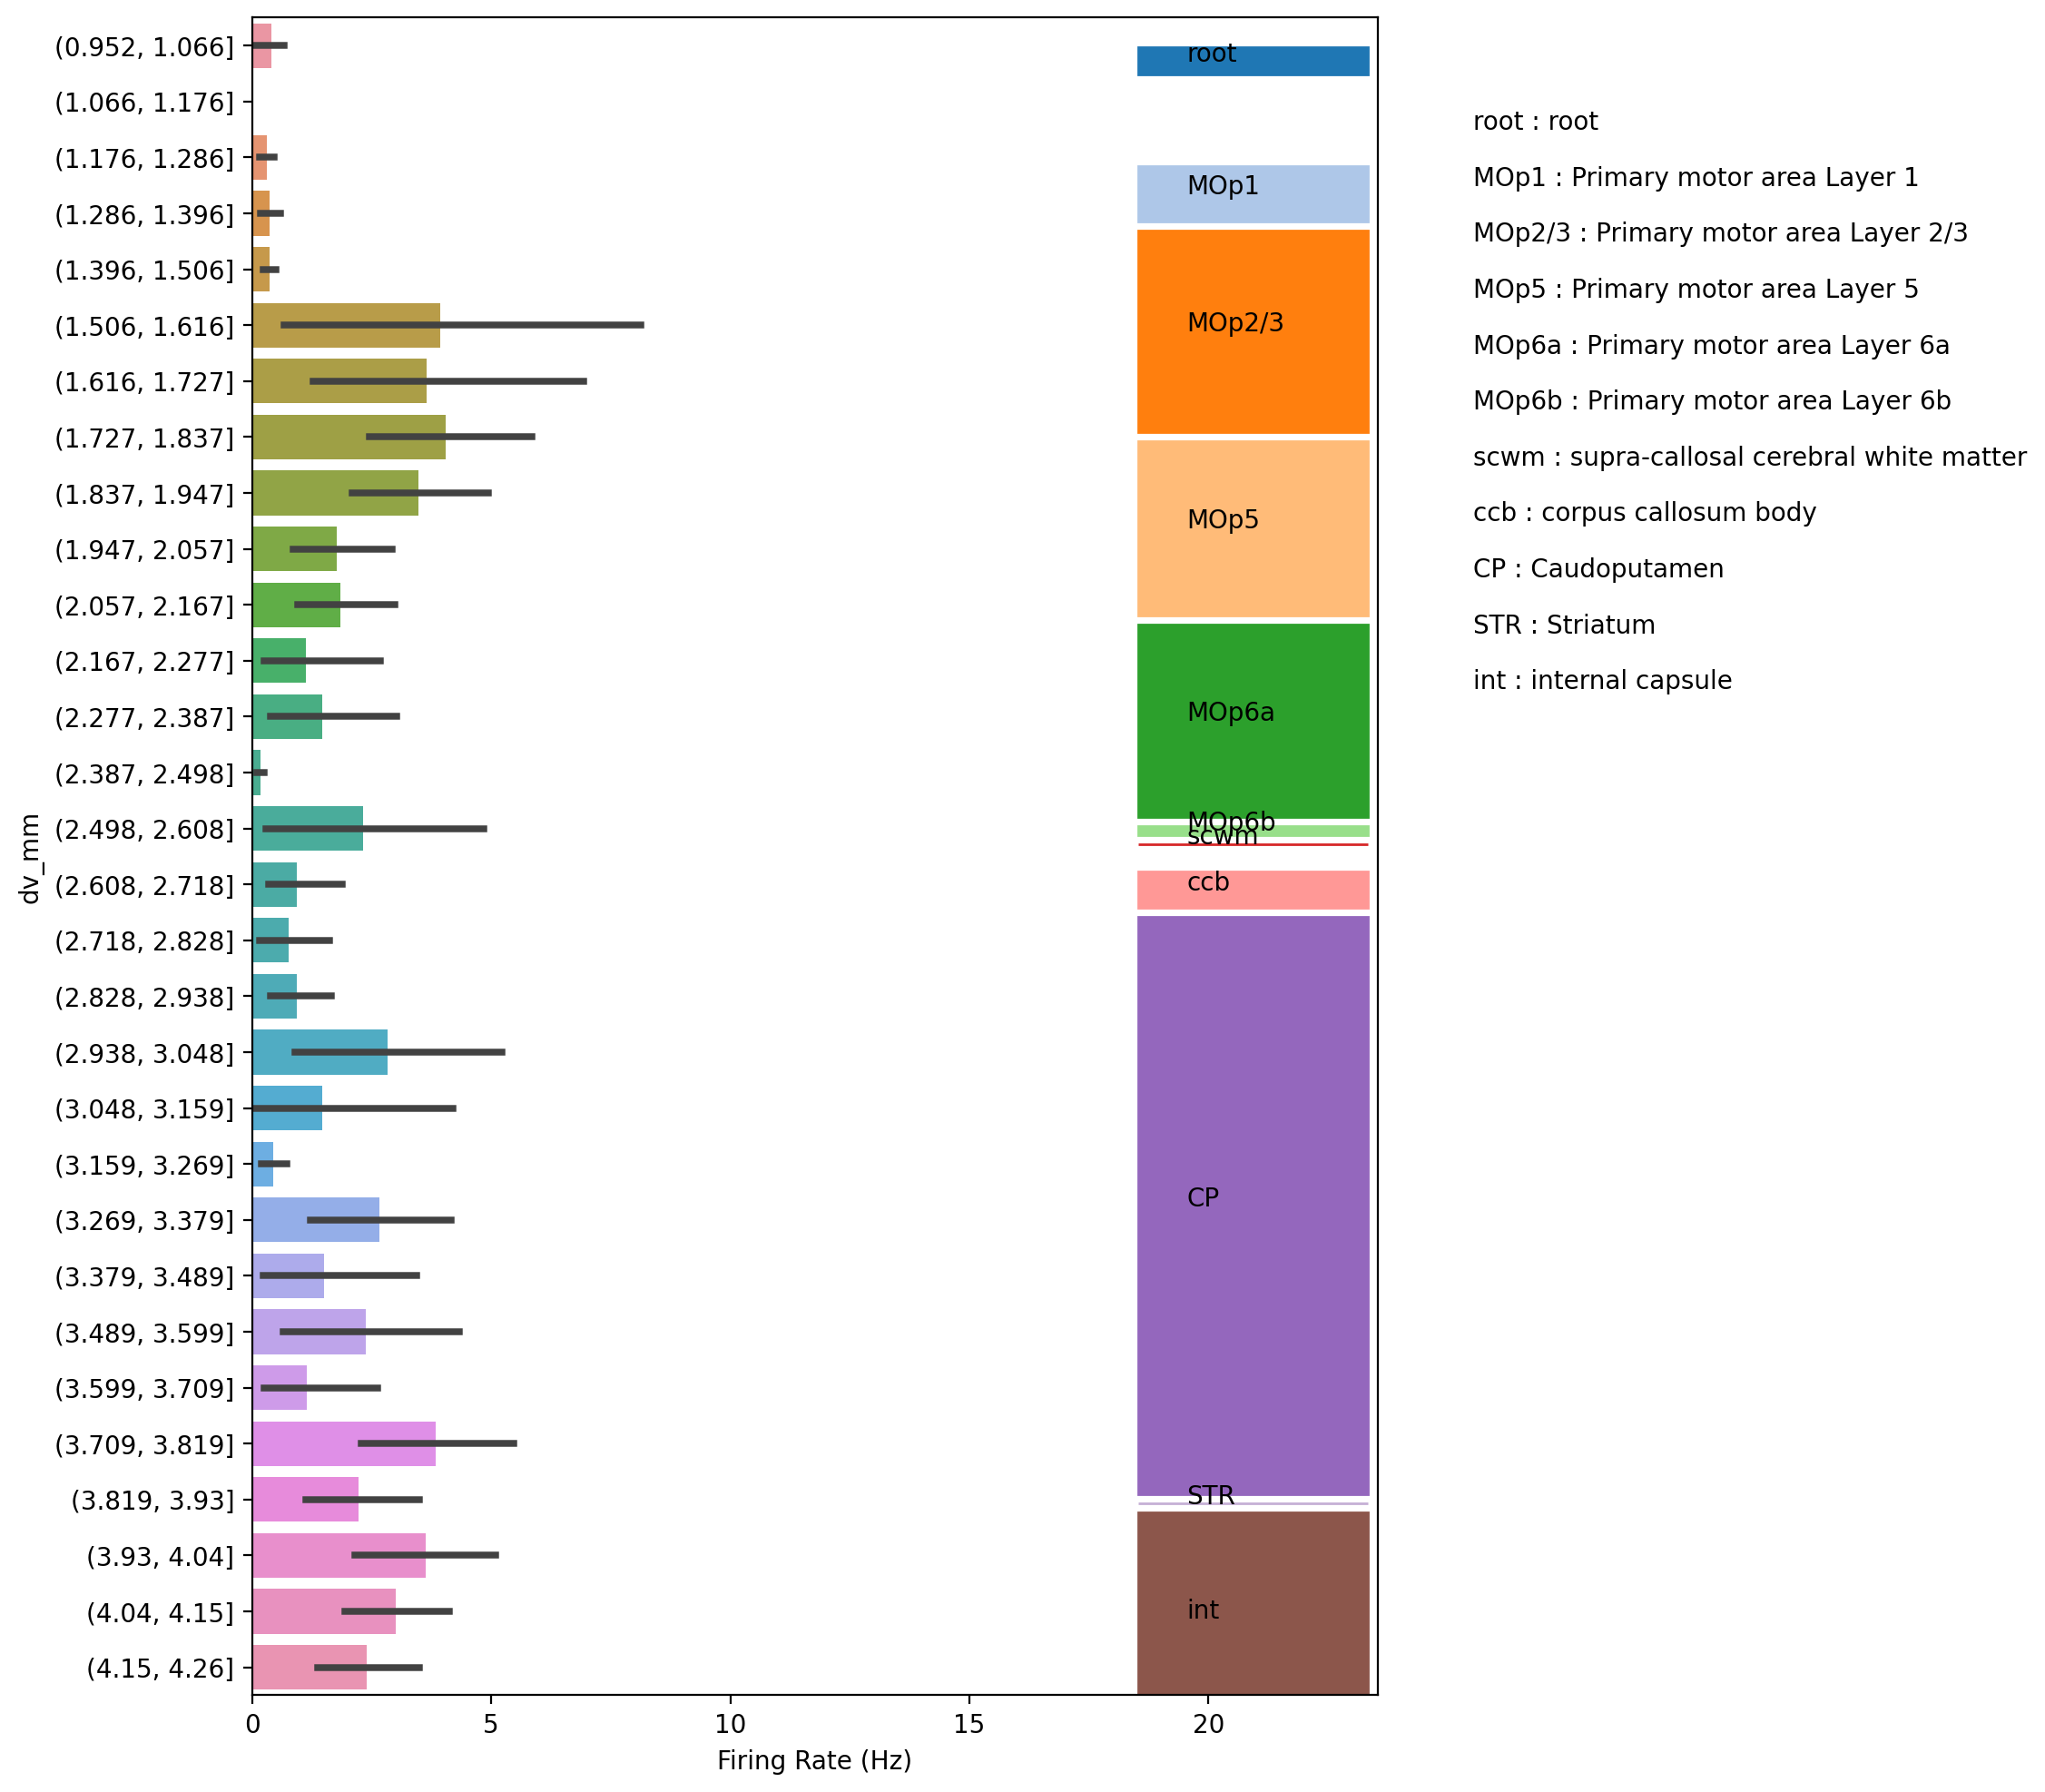

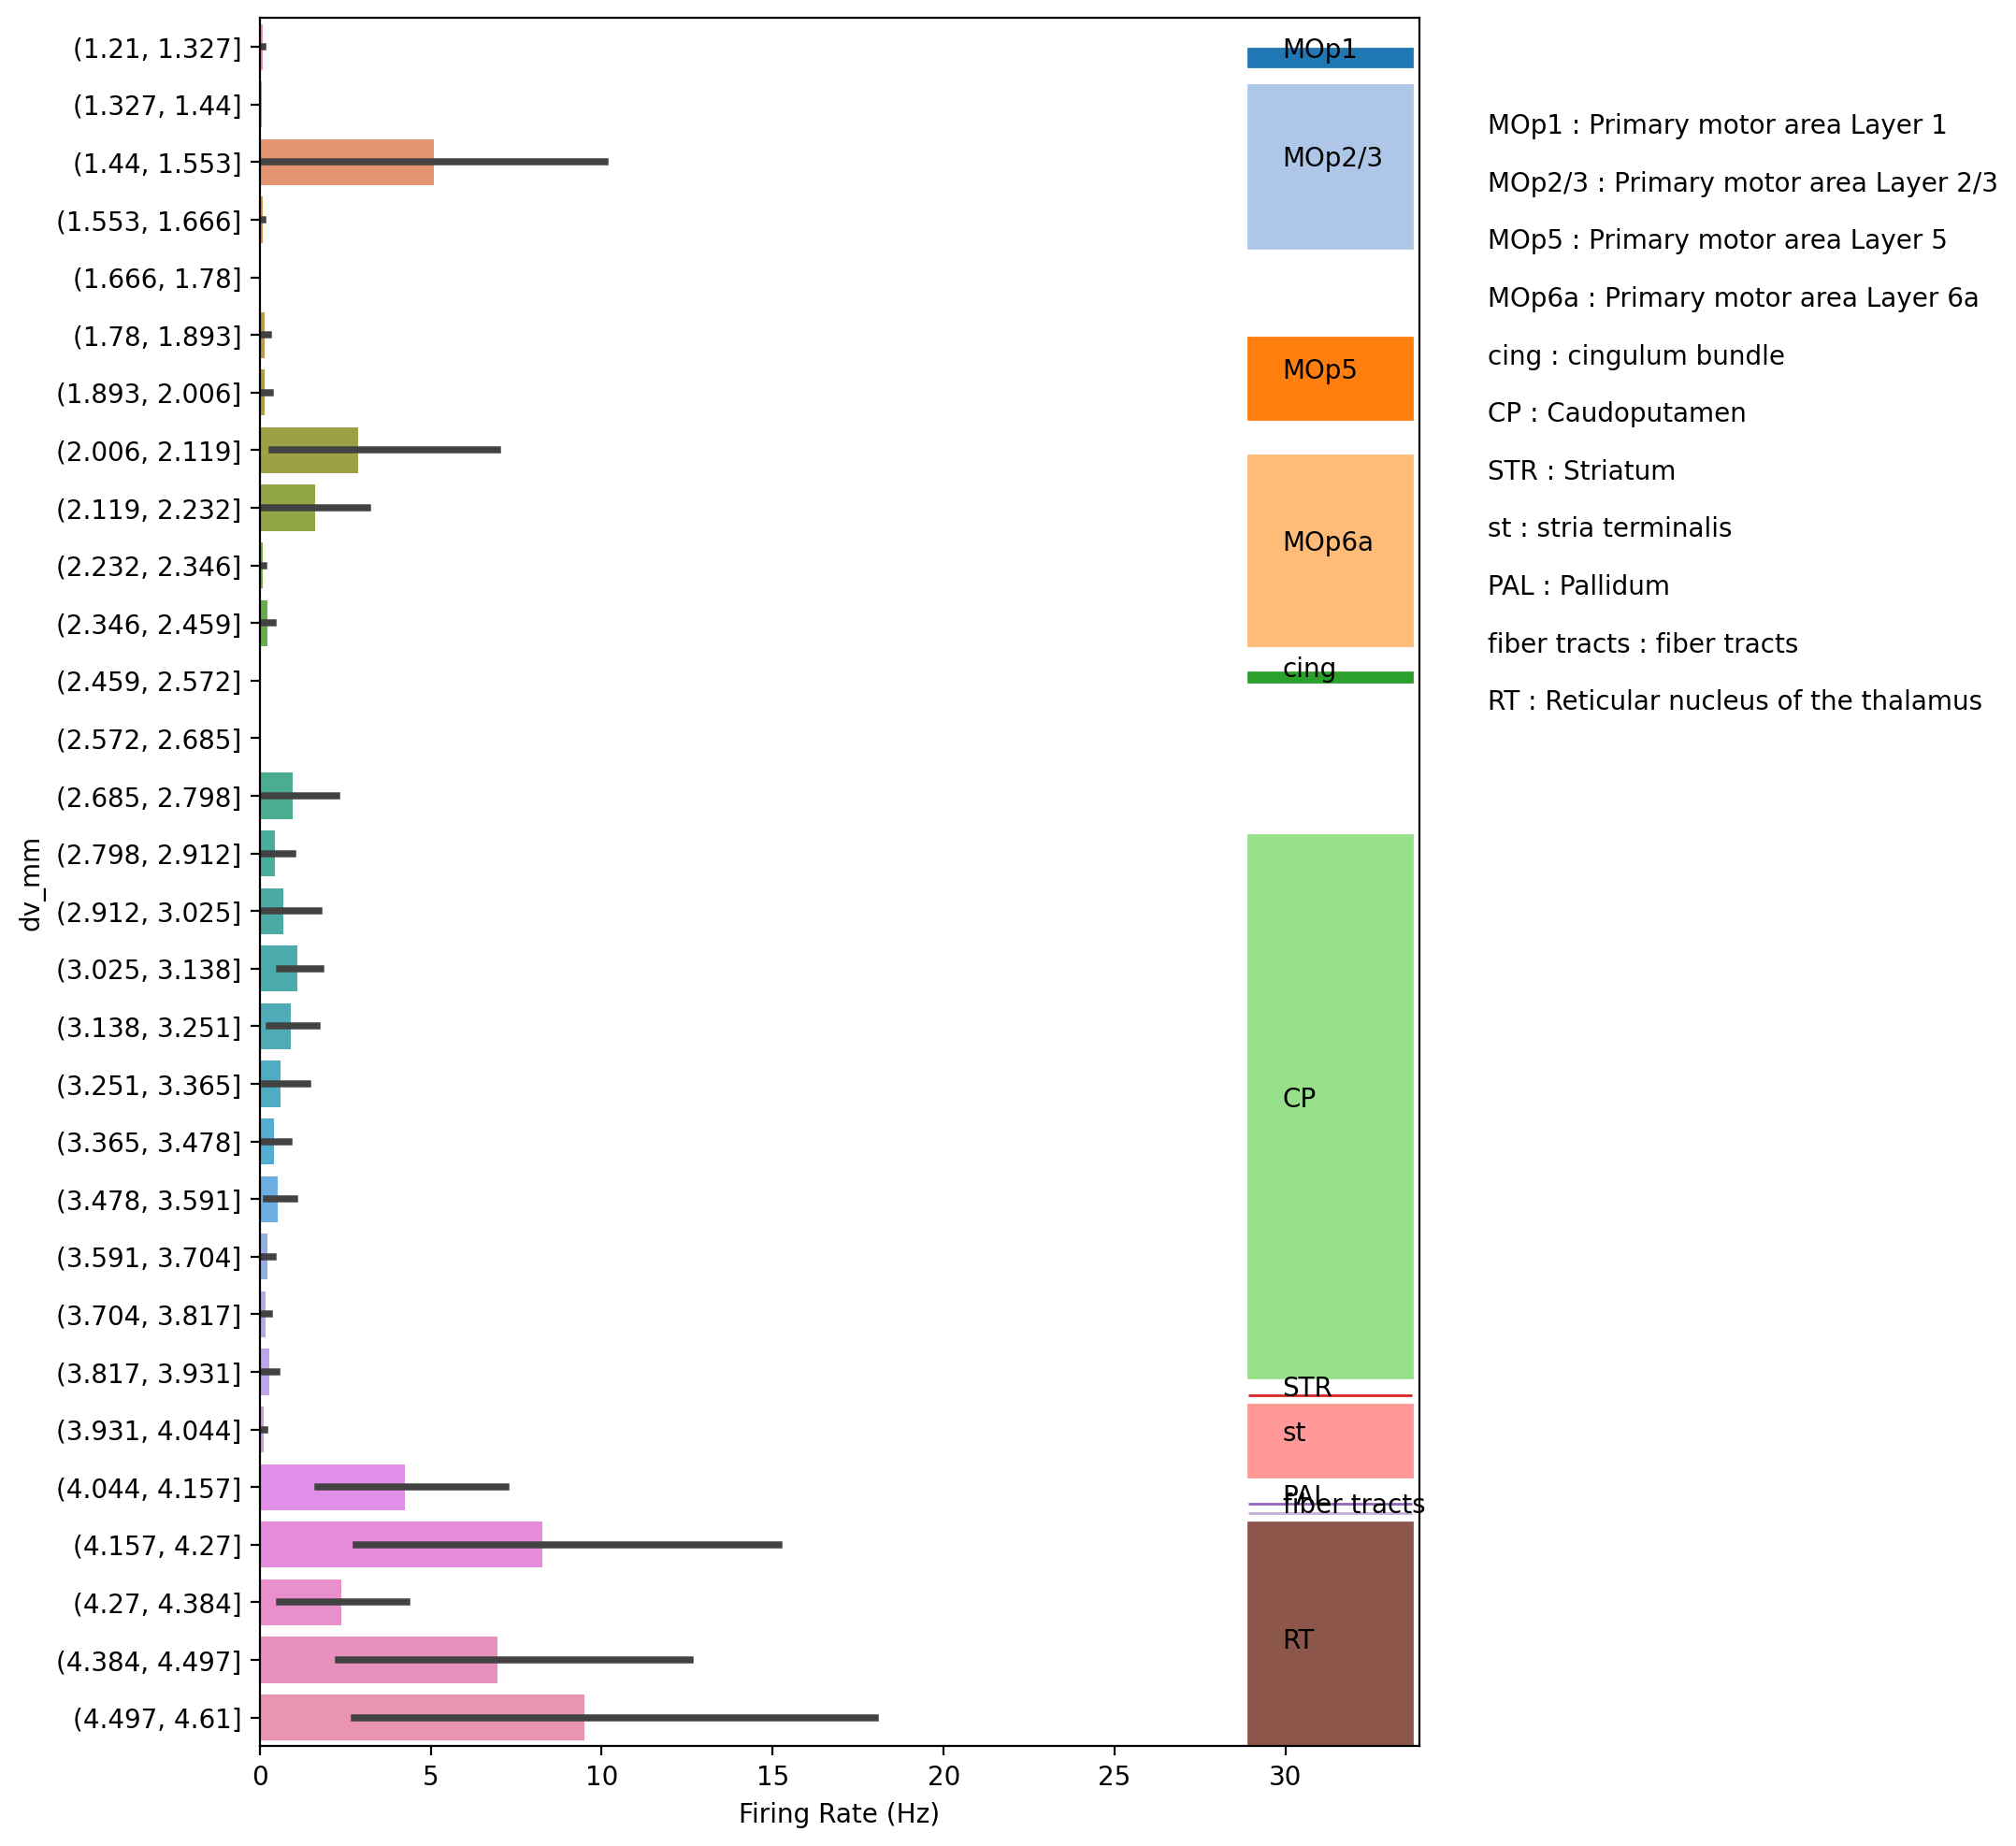

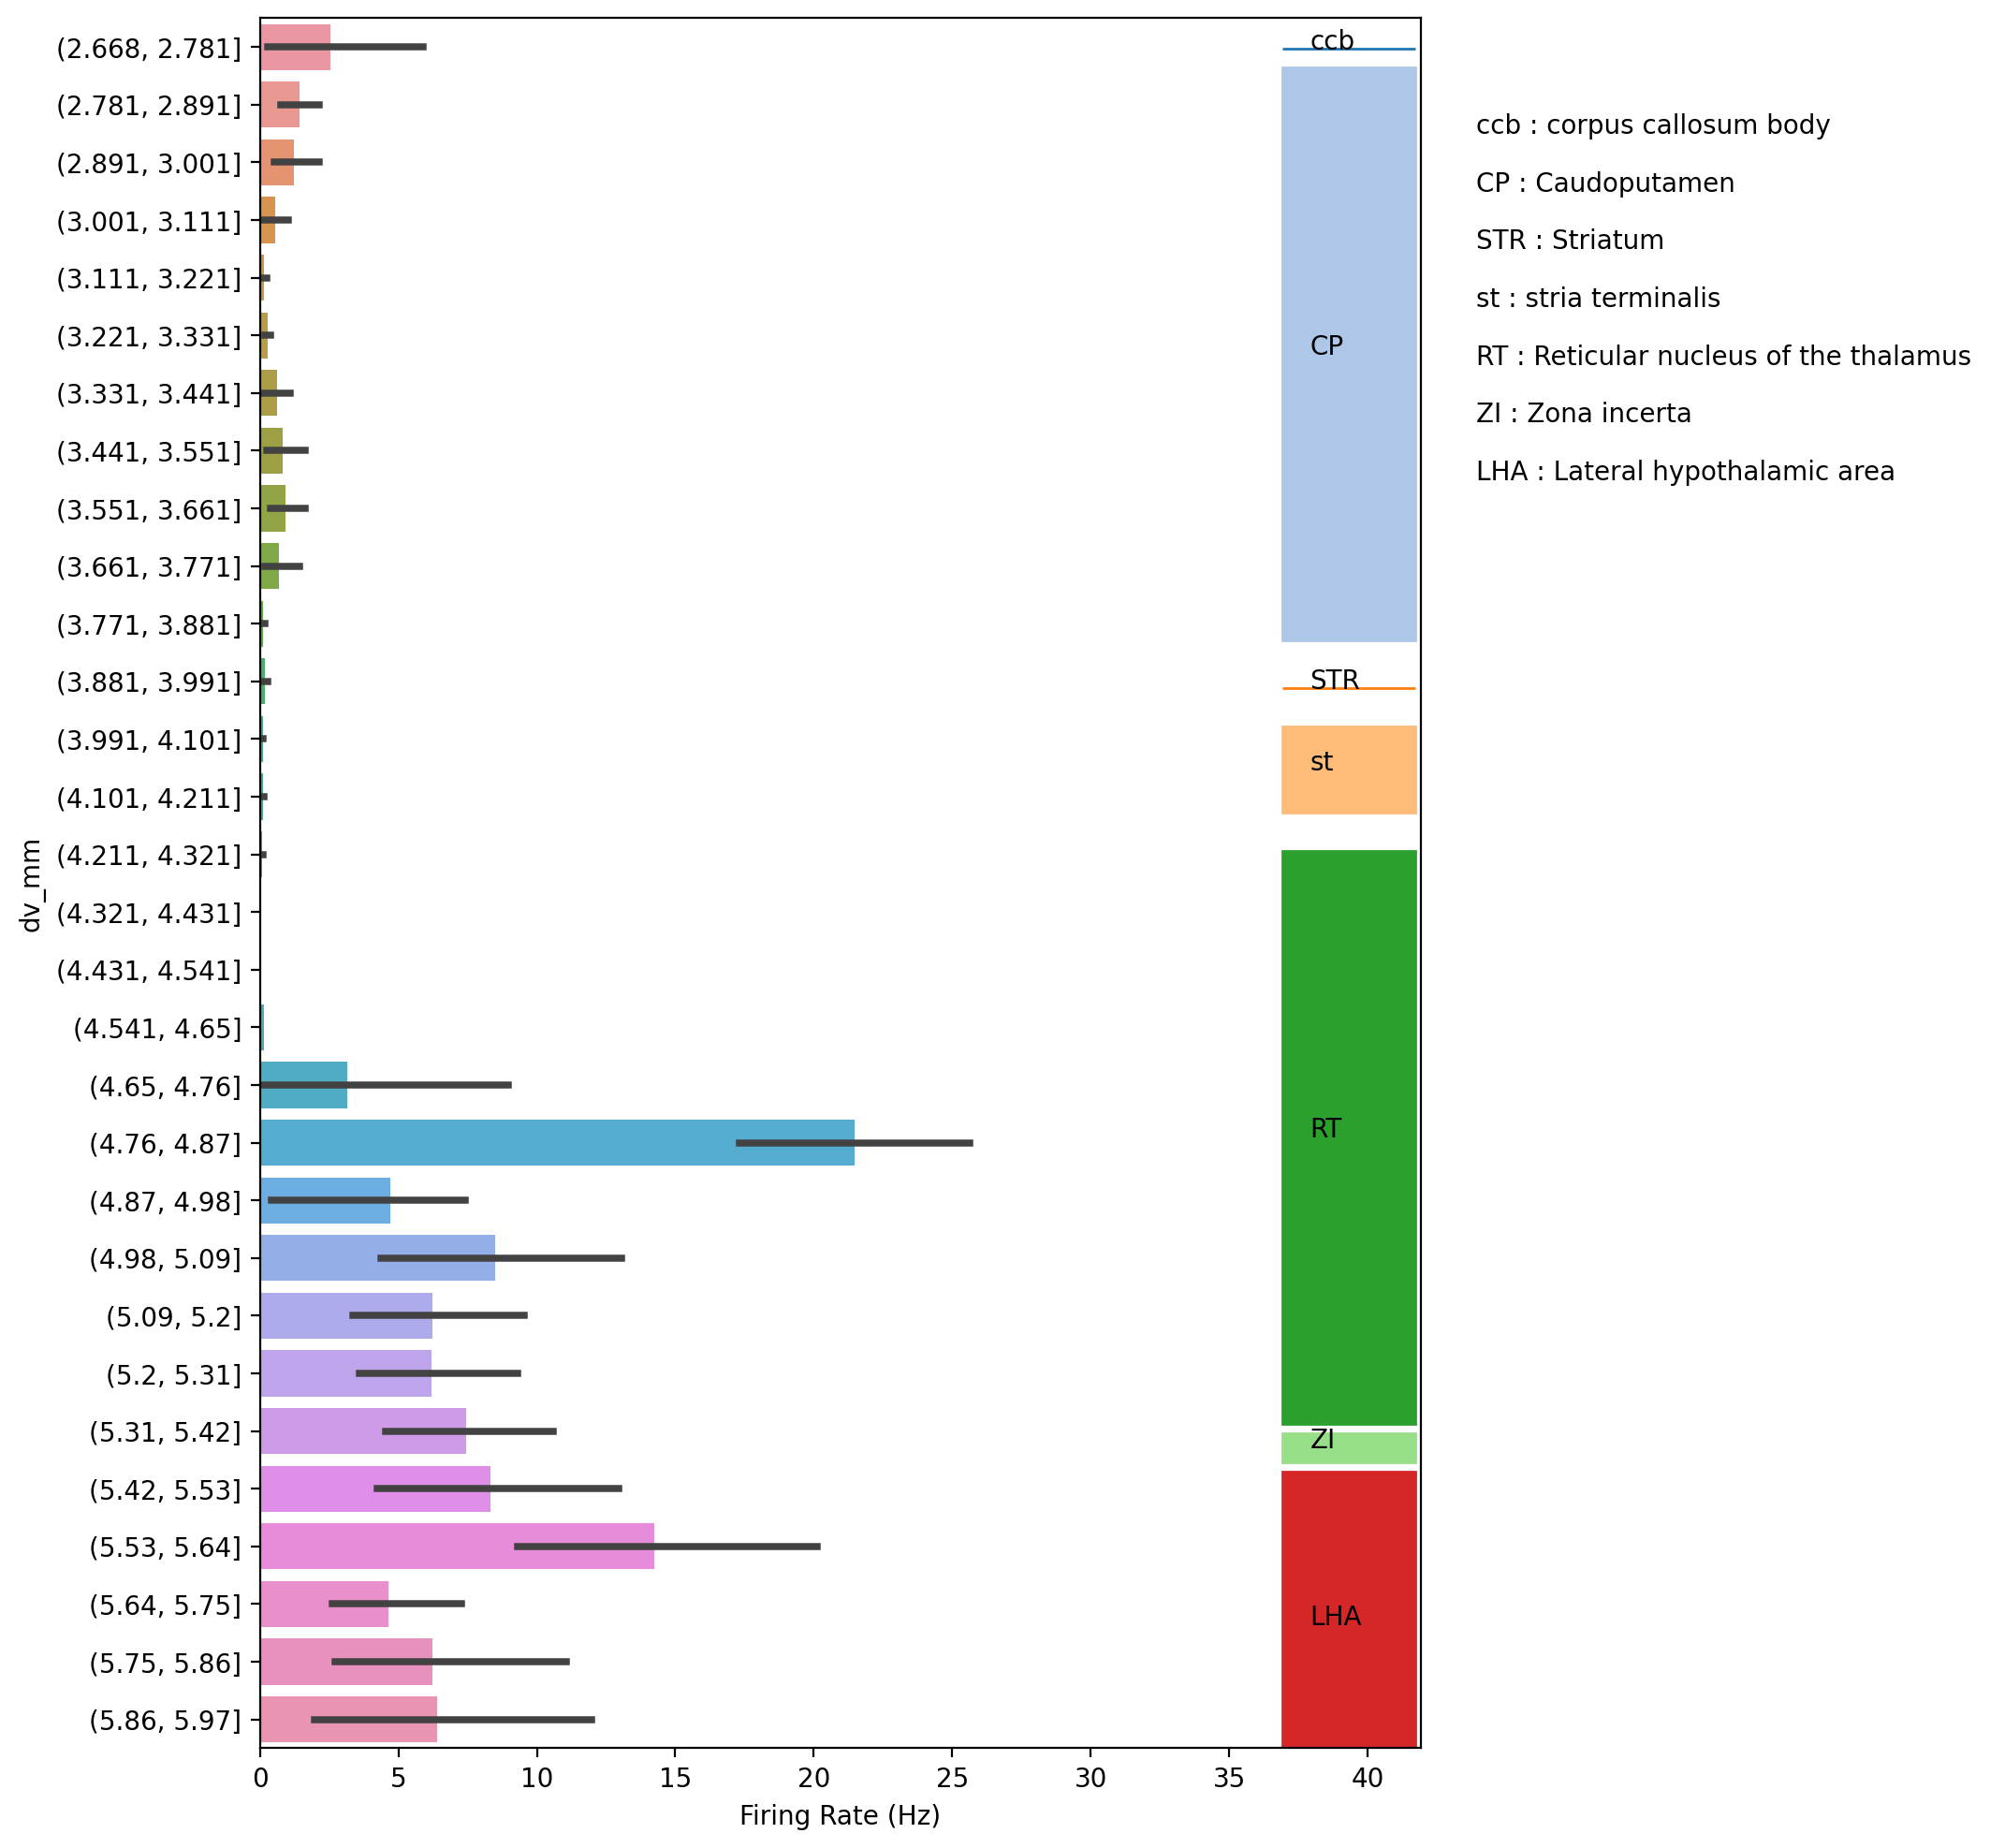

In [24]:
# TODO: figure out the best way to display aggregated data from multiple sessions
for session_date in df_cell_merge.session_date.unique():
    df_cell_probe= df_cell_merge[(df_cell_merge.probe_AB=='A') & (df_cell_merge.session_date == session_date)].copy()
    anat_utils.plot_firing_rate_regions(df_cell_probe)

In [11]:
# plt.figure(figsize=(8,12))
# sns.barplot(df_cell_merge, y='name', x='firingRate')